In [1]:
%matplotlib inline


# EnsembleVoteClassifier

Implementation of a majority voting `EnsembleVoteClassifier` for classification.

> from mlxtend.classifier import EnsembleVoteClassifier

# Overview

The `EnsembleVoteClassifier` is a meta-classifier for combining similar or conceptually different machine learning classifiers for classification via majority or plurality voting. (For simplicity, we will refer to both majority and plurality voting as majority voting.)


![](./EnsembleVoteClassifier_files/voting.png)


The `EnsembleVoteClassifier` implements "hard" and "soft" voting. In hard voting, we predict the final class label as the class label that has been predicted most frequently by the classification models. In soft voting, we predict the class labels by averaging the class-probabilities (only recommended if the classifiers are well-calibrated).

![](./EnsembleVoteClassifier_files/majority_voting.png)



**Note**

If you are interested in using the <code>EnsembleVoteClassifier</code>, please note that it is now also available through scikit learn (>0.17) as <a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html"><code>VotingClassifier</code></a>.

### Majority Voting / Hard Voting

Hard voting is the simplest case of majority voting. Here, we predict the class label $\hat{y}$ via majority (plurality) voting of each classifier $C_j$:

$$\hat{y}=mode\{C_1(\mathbf{x}), C_2(\mathbf{x}), ..., C_m(\mathbf{x})\}$$





Assuming that we combine three classifiers that classify a training sample as follows:

- classifier 1 -> class 0
- classifier 2 -> class 0
- classifier 3 -> class 1

$$\hat{y}=mode\{0, 0, 1\} = 0$$

Via majority vote, we would we would classify the sample as "class 0."

### Weighted Majority Vote

In addition to the simple majority vote (hard voting) as described in the previous section, we can compute a weighted majority vote by associating a weight $w_j$ with classifier $C_j$:

$$\hat{y} = \arg \max_i \sum^{m}_{j=1} w_j \chi_A \big(C_j(\mathbf{x})=i\big),$$

where $\chi_A$ is the characteristic function $[C_j(\mathbf{x}) = i \; \in A]$, and $A$ is the set of unique class labels. 

Continuing with the example from the previous section

- classifier 1 -> class 0
- classifier 2 -> class 0
- classifier 3 -> class 1

assigning the weights \{0.2, 0.2, 0.6\} would yield a prediction $\hat{y} = 1$:

$$\arg \max_i [0.2 \times i_0 + 0.2 \times i_0 + 0.6 \times i_1] = 1$$

### Soft Voting

In soft voting, we predict the class labels based on the predicted probabilities $p$ for classifier -- this approach is only recommended if the classifiers are well-calibrated.

$$\hat{y} = \arg \max_i \sum^{m}_{j=1} w_j p_{ij},$$

where $w_j$ is the weight that can be assigned to the $j$th classifier.

Assuming the example in the previous section was a binary classification task with class labels $i \in \{0, 1\}$, our ensemble could make the following prediction:

- $C_1(\mathbf{x}) \rightarrow [0.9, 0.1]$
- $C_2(\mathbf{x}) \rightarrow [0.8, 0.2]$
- $C_3(\mathbf{x}) \rightarrow [0.4, 0.6]$

Using uniform weights, we compute the average probabilities:

$$p(i_0 \mid \mathbf{x}) = \frac{0.9 + 0.8 + 0.4}{3} = 0.7 \\\\
p(i_1 \mid \mathbf{x}) = \frac{0.1 + 0.2 + 0.6}{3} = 0.3$$

$$\hat{y} = \arg \max_i \big[p(i_0 \mid \mathbf{x}), p(i_1 \mid \mathbf{x}) \big] = 0$$

However, assigning the weights \{0.1, 0.1, 0.8\} would yield a prediction $\hat{y} = 1$:
    
$$p(i_0 \mid \mathbf{x}) = {0.1 \times 0.9 + 0.1 \times 0.8 + 0.8 \times  0.4} = 0.49 \\\\
p(i_1 \mid \mathbf{x}) = {0.1 \times 0.1 + 0.2 \times 0.1 + 0.8 \times 0.6} = 0.51$$

$$\hat{y} = \arg \max_i \big[p(i_0 \mid \mathbf{x}), p(i_1 \mid \mathbf{x}) \big] = 1$$

### References


- [1] S. Raschka. [Python Machine Learning](https://github.com/rasbt/python-machine-learning-book). Packt Publishing Ltd., 2015.

## Example 1 -  Classifying Iris Flowers Using Different Classification Models

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

In [3]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
import numpy as np

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

print('5-fold cross validation:\n')

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes']

for clf, label in zip([clf1, clf2, clf3], labels):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.90 (+/- 0.05) [Logistic Regression]
Accuracy: 0.93 (+/- 0.05) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [Naive Bayes]


In [4]:
from mlxtend.classifier import EnsembleVoteClassifier

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']
for clf, label in zip([clf1, clf2, clf3, eclf], labels):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.90 (+/- 0.05) [Logistic Regression]
Accuracy: 0.93 (+/- 0.05) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [Naive Bayes]
Accuracy: 0.95 (+/- 0.05) [Ensemble]


#### Plotting Decision Regions

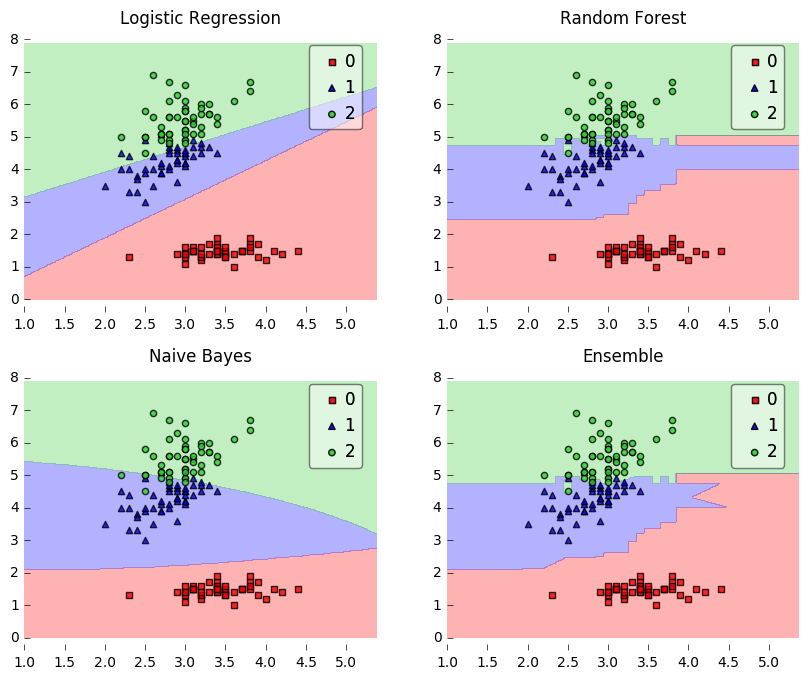

In [5]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']
for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)

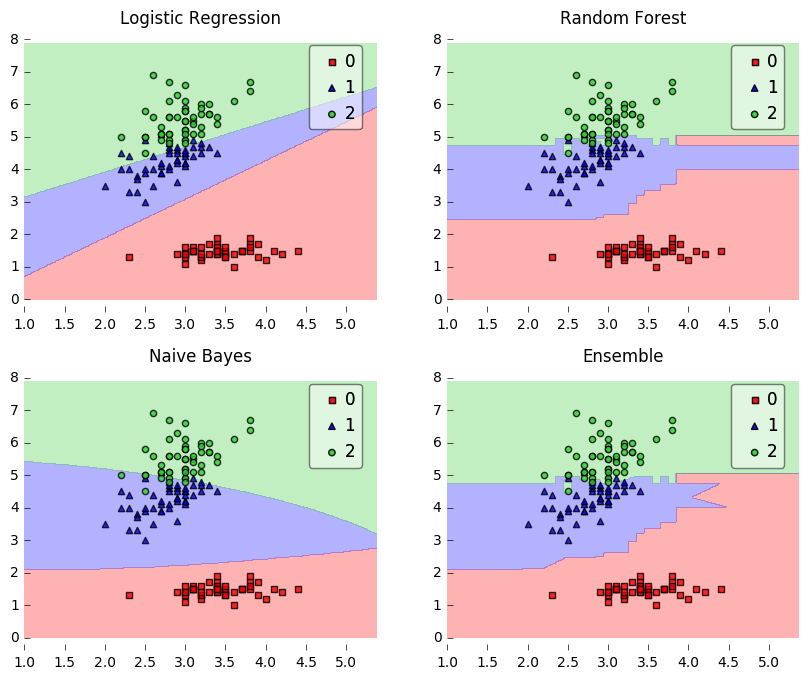

In [6]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']
for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)

## Example 2 - Grid Search

In [7]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], voting='soft')

params = {'logisticregression__C': [1.0, 100.0],
          'randomforestclassifier__n_estimators': [20, 200],}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid.fit(iris.data, iris.target)
    
cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

0.953 +/- 0.01 {'logisticregression__C': 1.0, 'randomforestclassifier__n_estimators': 20}
0.960 +/- 0.01 {'logisticregression__C': 1.0, 'randomforestclassifier__n_estimators': 200}
0.960 +/- 0.01 {'logisticregression__C': 100.0, 'randomforestclassifier__n_estimators': 20}
0.953 +/- 0.02 {'logisticregression__C': 100.0, 'randomforestclassifier__n_estimators': 200}


**Note**: If the `EnsembleClassifier` is initialized with multiple similar estimator objects, the estimator names are modified with consecutive integer indices, for example:

In [9]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf1, clf2], 
                              voting='soft')

params = {'logisticregression-1__C': [1.0, 100.0],
          'logisticregression-2__C': [1.0, 100.0],
          'randomforestclassifier__n_estimators': [20, 200],}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(iris.data, iris.target)

## Example 3 - Majority voting with classifiers trained on different feature subsets

Feature selection algorithms implemented in scikit-learn as well as the `SequentialFeatureSelector` implement a `transform` method that passes the reduced feature subset to the next item in a `Pipeline`.

For example, the method

    def transform(self, X):
        return X[:, self.k_feature_idx_]
        
returns the best feature columns, `k_feature_idx_`, given a dataset X.

Thus, we simply need to construct a `Pipeline` consisting of the feature selector and the classifier in order to select different feature subsets for different algorithms. During `fitting`, the optimal feature subsets are automatically determined via the `GridSearchCV` object, and by calling `predict`, the fitted feature selector in the pipeline only passes these columns along, which resulted in the best performance for the respective classifier.

In [10]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, :], iris.target

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

# Creating a feature-selection-classifier pipeline

sfs1 = SequentialFeatureSelector(clf1, 
                                 k_features=4,
                                 forward=True, 
                                 floating=False, 
                                 scoring='accuracy',
                                 verbose=0,
                                 cv=0)

clf1_pipe = Pipeline([('sfs', sfs1),
                      ('logreg', clf1)])

eclf = EnsembleVoteClassifier(clfs=[clf1_pipe, clf2, clf3], 
                              voting='soft')


params = {'pipeline__sfs__k_features': [1, 2, 3],
          'pipeline__logreg__C': [1.0, 100.0],
          'randomforestclassifier__n_estimators': [20, 200]}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid.fit(iris.data, iris.target)



cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

0.953 +/- 0.01 {'pipeline__sfs__k_features': 1, 'pipeline__logreg__C': 1.0, 'randomforestclassifier__n_estimators': 20}
0.947 +/- 0.02 {'pipeline__sfs__k_features': 1, 'pipeline__logreg__C': 1.0, 'randomforestclassifier__n_estimators': 200}
0.953 +/- 0.01 {'pipeline__sfs__k_features': 2, 'pipeline__logreg__C': 1.0, 'randomforestclassifier__n_estimators': 20}
0.947 +/- 0.02 {'pipeline__sfs__k_features': 2, 'pipeline__logreg__C': 1.0, 'randomforestclassifier__n_estimators': 200}
0.953 +/- 0.01 {'pipeline__sfs__k_features': 3, 'pipeline__logreg__C': 1.0, 'randomforestclassifier__n_estimators': 20}
0.953 +/- 0.02 {'pipeline__sfs__k_features': 3, 'pipeline__logreg__C': 1.0, 'randomforestclassifier__n_estimators': 200}
0.947 +/- 0.02 {'pipeline__sfs__k_features': 1, 'pipeline__logreg__C': 100.0, 'randomforestclassifier__n_estimators': 20}
0.953 +/- 0.02 {'pipeline__sfs__k_features': 1, 'pipeline__logreg__C': 100.0, 'randomforestclassifier__n_estimators': 200}
0.947 +/- 0.02 {'pipeline__sfs__

The best parameters determined via GridSearch are:

In [11]:
grid.best_params_

{'pipeline__logreg__C': 100.0,
 'pipeline__sfs__k_features': 3,
 'randomforestclassifier__n_estimators': 20}

Now, we assign these parameters to the ensemble voting classifier, fit the models on the complete training set, and perform a prediction on 3 samples from the Iris dataset.

In [12]:
eclf = eclf.set_params(**grid.best_params_)
eclf.fit(X, y).predict(X[[1, 51, 149]])

array([0, 1, 2])

#### Manual Approach

Alternatively, we can select different columns "manually" using the `ColumnSelector` object. In this example, we select only the first (sepal length) and third (petal length) column for the logistic regression classifier (`clf1`).

In [13]:
from mlxtend.feature_selection import ColumnSelector


col_sel = ColumnSelector(cols=[0, 2])

clf1_pipe = Pipeline([('sel', col_sel),
                      ('logreg', clf1)])

eclf = EnsembleVoteClassifier(clfs=[clf1_pipe, clf2, clf3],
                              voting='soft')
eclf.fit(X, y).predict(X[[1, 51, 149]])

array([0, 1, 2])

Furthermore, we can fit the `SequentialFeatureSelector` separately, outside the grid search hyperparameter optimization pipeline. Here, we determine the best features first, and then we construct a pipeline using these "fixed," best features as seed for the `ColumnSelector`:

In [14]:
sfs1 = SequentialFeatureSelector(clf1, 
                                 k_features=2,
                                 forward=True, 
                                 floating=False, 
                                 scoring='accuracy',
                                 verbose=1,
                                 cv=0)

sfs1.fit(X, y)

print('Best features', sfs1.k_feature_idx_)

col_sel = ColumnSelector(cols=sfs1.k_feature_idx_)

clf1_pipe = Pipeline([('sel', col_sel),
                      ('logreg', clf1)])

Features: 2/2

Best features (0, 2)


In [15]:
eclf = EnsembleVoteClassifier(clfs=[clf1_pipe, clf2, clf3], 
                              voting='soft')
eclf.fit(X, y).predict(X[[1, 51, 149]])

array([0, 1, 2])

## Example 5 - Using Pre-fitted Classifiers

In [16]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

Assume that we previously fitted our classifiers:

In [17]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
import numpy as np

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

for clf in (clf1, clf2, clf3):
    clf.fit(X, y)

By setting `refit=False`, the `EnsembleVoteClassifier` will not re-fit these classifers to save computational time:

In [18]:
from mlxtend.classifier import EnsembleVoteClassifier
import copy
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1], refit=False)

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']

eclf.fit(X, y)

print('accuracy:', np.mean(y == eclf.predict(X)))

accuracy: 0.973333333333


However, please note that `refit=False` is incompatible to any form of cross-validation that is done in e.g., `model_selection.cross_val_score` or `model_selection.GridSearchCV`, etc., since it would require the classifiers to be refit to the training folds. Thus, only use `refit=False` if you want to make a prediction directly without cross-validation.

## Example 6 - Ensembles of Classifiers that Operate on Different Feature Subsets

If desired, the different classifiers can be fit to different subsets of features in the training dataset. The following example illustrates how this can be done on a technical level using scikit-learn pipelines and the `ColumnSelector`:

In [1]:
from sklearn.datasets import load_iris
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.feature_selection import ColumnSelector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X = iris.data
y = iris.target

pipe1 = make_pipeline(ColumnSelector(cols=(0, 2)),
                      LogisticRegression())
pipe2 = make_pipeline(ColumnSelector(cols=(1, 2, 3)),
                      LogisticRegression())

eclf = EnsembleVoteClassifier(clfs=[pipe1, pipe2])

eclf.fit(X, y)

EnsembleVoteClassifier(clfs=[Pipeline(steps=[('columnselector', ColumnSelector(cols=(0, 2))), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='libl...='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])],
            refit=True, verbose=0, voting='hard', weights=None)

# API

In [1]:
with open('../../api_modules/mlxtend.classifier/EnsembleVoteClassifier.md', 'r') as f:
    print(f.read())

## EnsembleVoteClassifier

*EnsembleVoteClassifier(clfs, voting='hard', weights=None, verbose=0, refit=True)*

Soft Voting/Majority Rule classifier for scikit-learn estimators.

**Parameters**

- `clfs` : array-like, shape = [n_classifiers]

    A list of classifiers.
    Invoking the `fit` method on the `VotingClassifier` will fit clones
    of those original classifiers that will
    be stored in the class attribute
    `self.clfs_` if `refit=True` (default).

- `voting` : str, {'hard', 'soft'} (default='hard')

    If 'hard', uses predicted class labels for majority rule voting.
    Else if 'soft', predicts the class label based on the argmax of
    the sums of the predicted probalities, which is recommended for
    an ensemble of well-calibrated classifiers.

- `weights` : array-like, shape = [n_classifiers], optional (default=`None`)

    Sequence of weights (`float` or `int`) to weight the occurances of
    predicted class labels (`hard` voting) or class probabilities
    before 